# Problem Statement

To predict the salary of the Employees based on the given features.

# Features / Independent Variables

1. rank
2. discipline
3. yrs.since.phd
4. yrs.service
5. sex

# Label / Dependent Variable

 salary

# Importing Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#  Read csv file and convert into DataFrame

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Checking for shape of dataset

In [4]:
df.shape

(397, 6)

# Top 5 Rows of Dataset

In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Bottom 5 rows of Dataset

In [6]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


# Understanding the data at high level

In [4]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Getting More Info about Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Checking for null values

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

The above code shows that there are no null values present in the dataset

# Distribution of Categorical data

In [13]:
print(df['rank'].value_counts())
print(df['discipline'].value_counts())
print(df['sex'].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


# Encoding the Categorical data

In [14]:
# Encoding rank
df.replace({'rank':{'AsstProf':0,'AssoProf':1,'Prof':2}},inplace = True)

# Encoding discipline
df.replace({'discipline':{'A':0,'B':1}},inplace = True)

# Encoding sex
df.replace({'sex':{'Female':0,'Male':1}},inplace = True)


# Checking whether encoding is successfull or not

In [15]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,0,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


# Dividing dataset into Features and Label

In [16]:
x = df.drop(columns = ['rank','salary'])
y = df['salary']

In [17]:
x

,discipline,yrs.since.phd,yrs.service,sex
0,1,19,18,1
1,1,20,16,1
2,1,4,3,1
3,1,45,39,1
4,1,40,41,1
...,...,...,...,...
392,0,33,30,1
393,0,31,19,1
394,0,42,25,1
395,0,25,15,1


In [18]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

# Splitting data into training and test data

In [36]:
# splitting training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 434)

# Training the Model

In [37]:
# Loading Linear Regression model
lr = LinearRegression()

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [39]:
training_data_prediction = lr.predict(x_train)

# R squared error

In [40]:
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R Squared Error :",error_score)

R Squared Error : 0.3033556206964533


# Visualization of Actual Salary and Predicted Salary

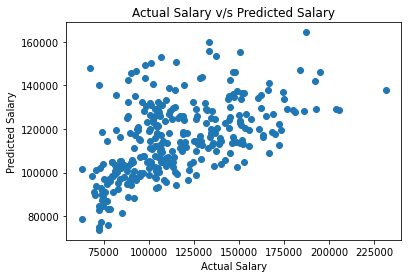

In [41]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual Salary v/s Predicted Salary")
plt.show()

# Test data prediction

In [42]:
testing_data_prediction = lr.predict(x_test)

# R squared error for test data

In [43]:
error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R Squared Error :",error_score)

R Squared Error : 0.005465604719290806


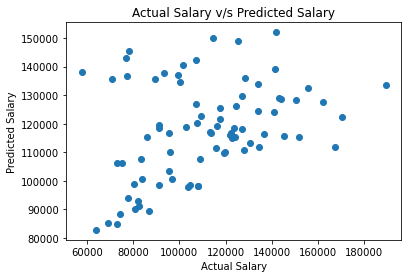

In [44]:
# Visualization of Actual Salary and Predicted Salary
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual Salary v/s Predicted Salary")
plt.show()

# Lasso Regression Model

In [45]:
# Loading Lasso Regression model
las_reg_model = Lasso()

In [46]:
las_reg_model.fit(x_train, y_train)

Lasso()

In [47]:
# Model Evaluation

training_data_prediction = las_reg_model.predict(x_train)

In [48]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R Squared Error :",error_score)

R Squared Error : 0.30335560560878505


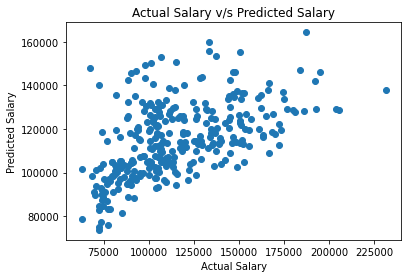

In [49]:
# Visualization of Actual Salary and Predicted Salary
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual Salary v/s Predicted Salary")
plt.show()

In [50]:
testing_data_prediction = las_reg_model.predict(x_test)

In [51]:
# R squared error
error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R Squared Error :",error_score)

R Squared Error : 0.005453661198564386


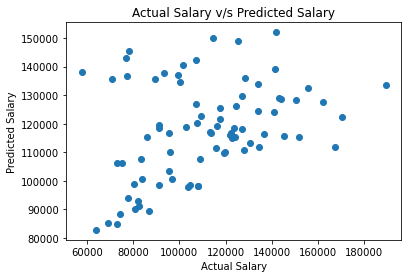

In [52]:
# Visualization of Actual Salary and Predicted Salary
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual Salary v/s Predicted Salary")
plt.show()